<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0610/01_1_%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B8%B0%EC%B4%88_Numpy(%EC%A0%95%EB%8B%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 수식만들기 연습

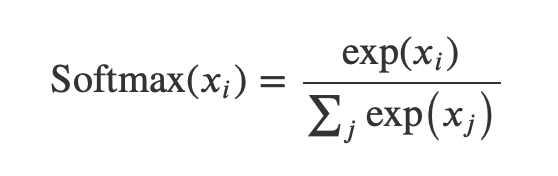

In [ ]:
import numpy as np

def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = expL / sumExpL
    return result

print(softmax([2, 1, 0]))

[0.66524096 0.24472847 0.09003057]


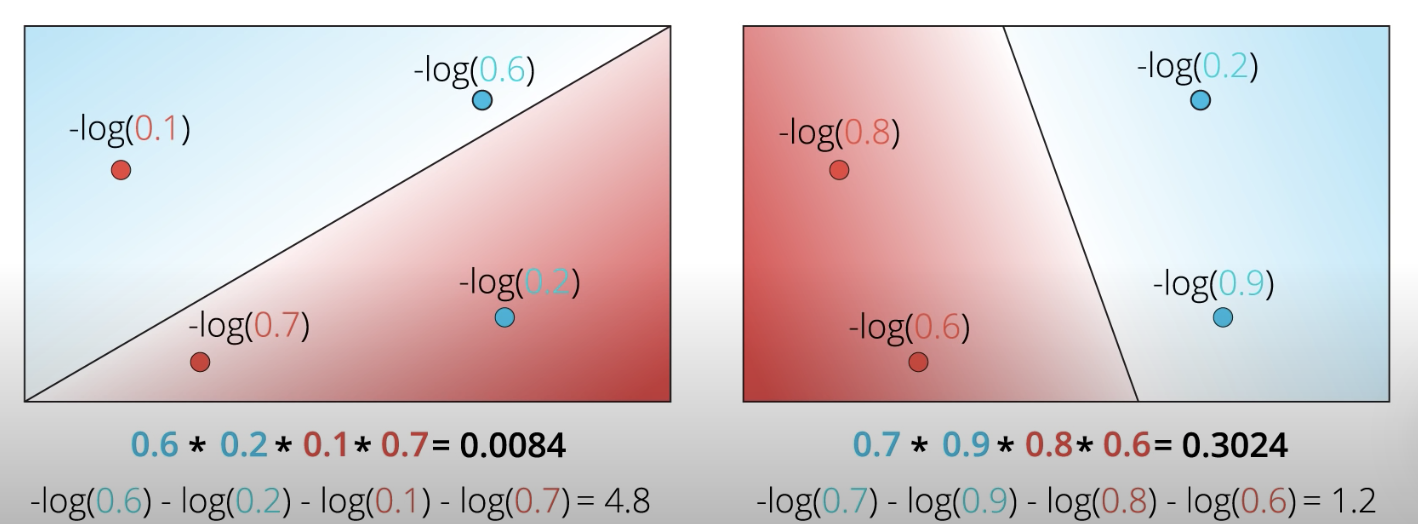

In [ ]:
import numpy as np

def cross_entropy(Y, pred):
    Y = np.float_(Y)
    pred = np.float_(pred)
    return -np.sum(Y*np.log(pred) + (1 - Y)*np.log(1 -pred)).round(1)

In [ ]:
pred = [[0.6, 0.2, 0.9, 0.3],[0.7, 0.9, 0.2, 0.4]] 
Y = [[1, 1, 0, 0],[1, 1, 0, 0]]

for p, y in zip(pred, Y):
  print(cross_entropy(y, p))

4.8
1.2


## 2. 학습시키기

- n_samples : data의 수, 기본값은 100
- n_features : feature의 수, 기본값은 20
- n_informative : 독립변수중 종속변수와 상관관계가 있는 성분의 수(y와 관련이 있는 x의 수), 기본값은 2
- n_redundant : 다른 독립변수들의 선형조합으로 만들어지는 독립변수의 수(다른 x들의 선형조합으로 만들어 지는 x의 수), 기본값은 2
- n_classes : 종속변수의 class 수, 기본값은 2 (이진 데이터)
- n_clusters_per_class : 각 클래스당 클러스터 수, 기본값은 2, 클래스당 클러스터 수를 늘리게 되면 클래스 끼리 잘 분리되지 않은 상태의 데이터를 생성하게 된다

In [ ]:
from sklearn.datasets import make_classification


X, y = make_classification(n_samples = 200, n_features = 2, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 25)

X.shape, y.shape

((200, 2), (200,))

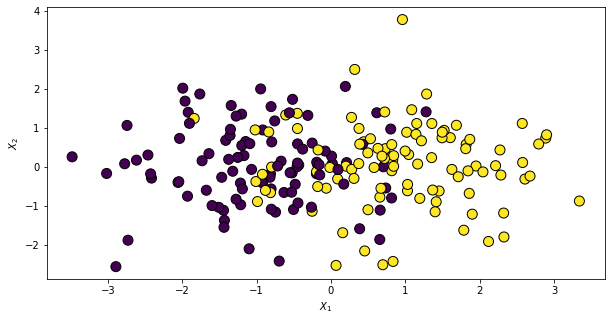

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,5))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 100, edgecolors= "k")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.

Sigmoid activation function
$$\sigma(x) = \frac{1}{1+e^{-x}}$$
Output (prediction) formula
$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$
Error function
$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$
The function that updates the weights
$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$$$ b \longrightarrow b + \alpha (y - \hat{y})$$

- 미분 결과 참고 : https://www.python-unleashed.com/post/derivation-of-the-binary-cross-entropy-loss-gradient

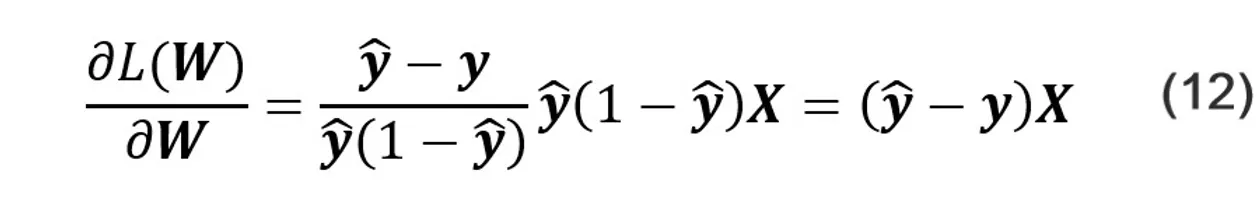

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

min_, max_ = X.min()-1, X.max()+1

def plot_points(X, y):
    pos = X[np.argwhere(y==1)]
    neg = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in neg], [s[0][1] for s in neg], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in pos], [s[0][1] for s in pos], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(min_, max_)
    plt.ylim(min_, max_)
    x = np.arange(min_, max_, 0.1)

    plt.plot(x, m*x+b, color)

In [ ]:

# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
  return 1/ (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1- y)* np.log(1 - output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
  output = output_formula(x, weights, bias)
  gradient = y - output
  weights += learnrate * gradient * x
  bias += learnrate * gradient

  return weights, bias
    

###Training function

In [ ]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0

    for e in range(epochs):
        # 가중치 초기화
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.5822825888194763
Accuracy:  0.72

========== Epoch 10 ==========
Train loss:  0.3845464900608862
Accuracy:  0.825

========== Epoch 20 ==========
Train loss:  0.38318688618344005
Accuracy:  0.83

========== Epoch 30 ==========
Train loss:  0.3831061492218823
Accuracy:  0.83

========== Epoch 40 ==========
Train loss:  0.3830964435954794
Accuracy:  0.83

========== Epoch 50 ==========
Train loss:  0.38309467772402234
Accuracy:  0.83

========== Epoch 60 ==========
Train loss:  0.3830943069647704
Accuracy:  0.83

========== Epoch 70 ==========
Train loss:  0.3830942262845858
Accuracy:  0.83

========== Epoch 80 ==========
Train loss:  0.38309420858747395
Accuracy:  0.83

========== Epoch 90 ==========
Train loss:  0.38309420469914685
Accuracy:  0.83


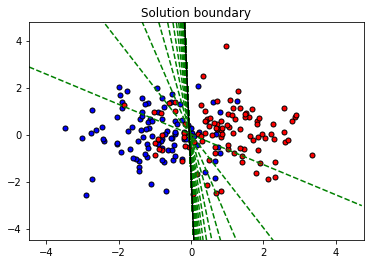

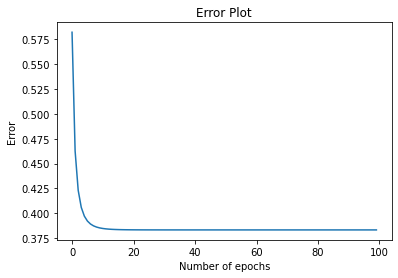

In [ ]:
train(X, y, epochs, learnrate, True)